<a href="https://colab.research.google.com/github/GreggHeller1/PMT_linearization/blob/main/scripts/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#settings
%load_ext autoreload
%autoreload 2
try:
  import google.colab
  in_colab = True
except:
  in_colab = False
print(f'Session is in colab: {in_colab}')
#installs (for colab only, run this once)
if in_colab:
    ! git clone https://github.com/GreggHeller1/PMT_linearization.git

#local imports
#cwd if in colab for imports to work
if in_colab:
    %cd /content/PMT_linearization
    
from src import data_io as io
from src import plotting as plot
#from src import computation as comp
from src import main
#from src import config as gcfg

if in_colab:
    %cd /content/PMT_linearization/scripts
    

Session is in colab: False
Session is in colab: False


In [14]:
#Unmixing parameters - these override the defaults in app_config.py
#if you are not changing parameters frequently you should set them in app_config.py and delete them here
cfg = main.UnmixingSession()

cfg.open_path = "/Users/Gregg/Dropbox (MIT)/For Gregg/020223/Newunmixing_testing/3C_PVsynTD_TG_YFP"
#for windows use r"/path/to/image/pasted/here"

cfg.save_path = None
#set to None to use the same location as open_path

###########################################################
cfg.linearize_PMTs = False                 #True or False

cfg.past_correctible_range = 'max'        #zero, max, correct
#zero: set the pixel value to zero in all channels
#max: set the pixel values in all channels to the maximum corrected value. This should make it obvious which pixels to ignore
#correct: use the best fit curve to attempt to linearize them anyway. This should never make the estimates WORSE

###########################################################
cfg.unmix= True                           #True or False

#Either load the coefficients from files
#flourophores = ['BFB', 'YGFB', 'RFB', 'DRFB']
#unmixing_coefficients = io.get_unmixing_mat(flourophore_list = flourophores)

#Or enter them manually
#FOR SAMPLE CELL
cfg.unmixing_coefficient_dict = {
    'TFP': [.622325, .34619, .031483],
    'YFP': [.199198, .707837, .092694],
    'RFP': [0.06666, .092964, .77324],
    }

cfg.handle_negatives =  'set_to_zero'     #'set_to_zero', 'non_negative_least_squares' or None
#set_to_zero: run the unmixing as normal and then set all negative pixel values to 0
#non_negative_least_squares: use a different algorithm that allows only positive values (https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.nnls.html)
#None: Return negative values

###########################################################
cfg.smoothing='original_spline_smoothing'   #None or 'original_spline_smoothing'

###########################################################
cfg.save_original_tiff = False          #True or False

cfg.save_processed_tiff = True         #True or False

cfg.compression = None               #None or LZW, maybe others? unclear documentation...

cfg.my_init(verbose=True)

Using the following values:
Save path = /Users/Gregg/Dropbox (MIT)/For Gregg/020223/Newunmixing_testing/3C_PVsynTD_TG_YFP
Filename = 3C_PVsynTD_TG_YFP
Number of channels = 3
Unmixing matrix = 
[[0.622325 0.199198 0.06666 ]
 [0.34619  0.707837 0.092964]
 [0.031483 0.092694 0.77324 ]]


In [15]:
#data inputs
#io.readfile(test_path)
image, tif_tags = io.imread(cfg.open_path, num_channels=cfg.num_channels, verbose=True)

Image open executed without errors. The image is (191, 800, 800, 3)


In [16]:
#data manipulation/
print(f"The image is {image.shape[3]} channels,{image.shape[1]}x{image.shape[2]} pixels and {image.shape[0]} Z frames")
new_image, residuals = main.process_image(cfg, image)

The image is 3 channels,800x800 pixels and 191 Z frames
Unmixing Matrix = 
[[0.622325 0.199198 0.06666 ]
 [0.34619  0.707837 0.092964]
 [0.031483 0.092694 0.77324 ]]
Number of flourophores = 3, Channels = 3


/Users/Gregg/code/PMT_linearization/src/computation.py:315: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_inferred, res, rank, s = np.linalg.lstsq(A, channels_x_pixels)


In [17]:
#data output
io.umixing_app_save(cfg, image, new_image)

Saving image to /Users/Gregg/Dropbox (MIT)/For Gregg/020223/Newunmixing_testing/3C_PVsynTD_TG_YFP/3C_PVsynTD_TG_YFP_unmixed_smoothed.tiff
Save complete


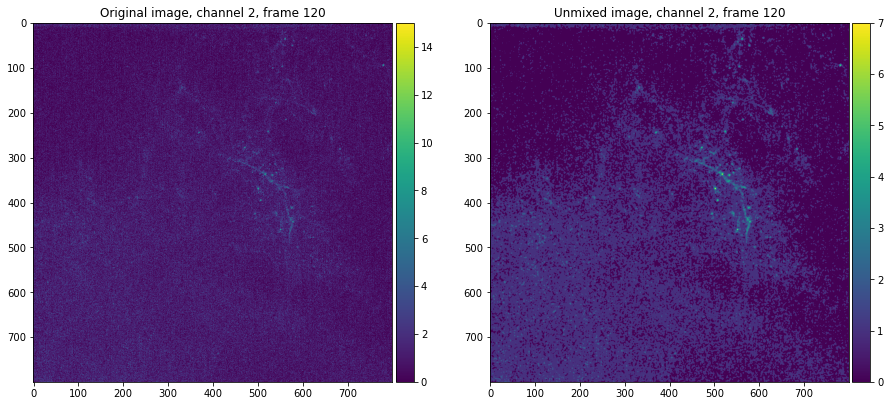

In [11]:
#plots
#a single channel of original and processed images
channel = 2
frame = 120

plot.paired_images_single_channel(image, new_image, frame, channel)


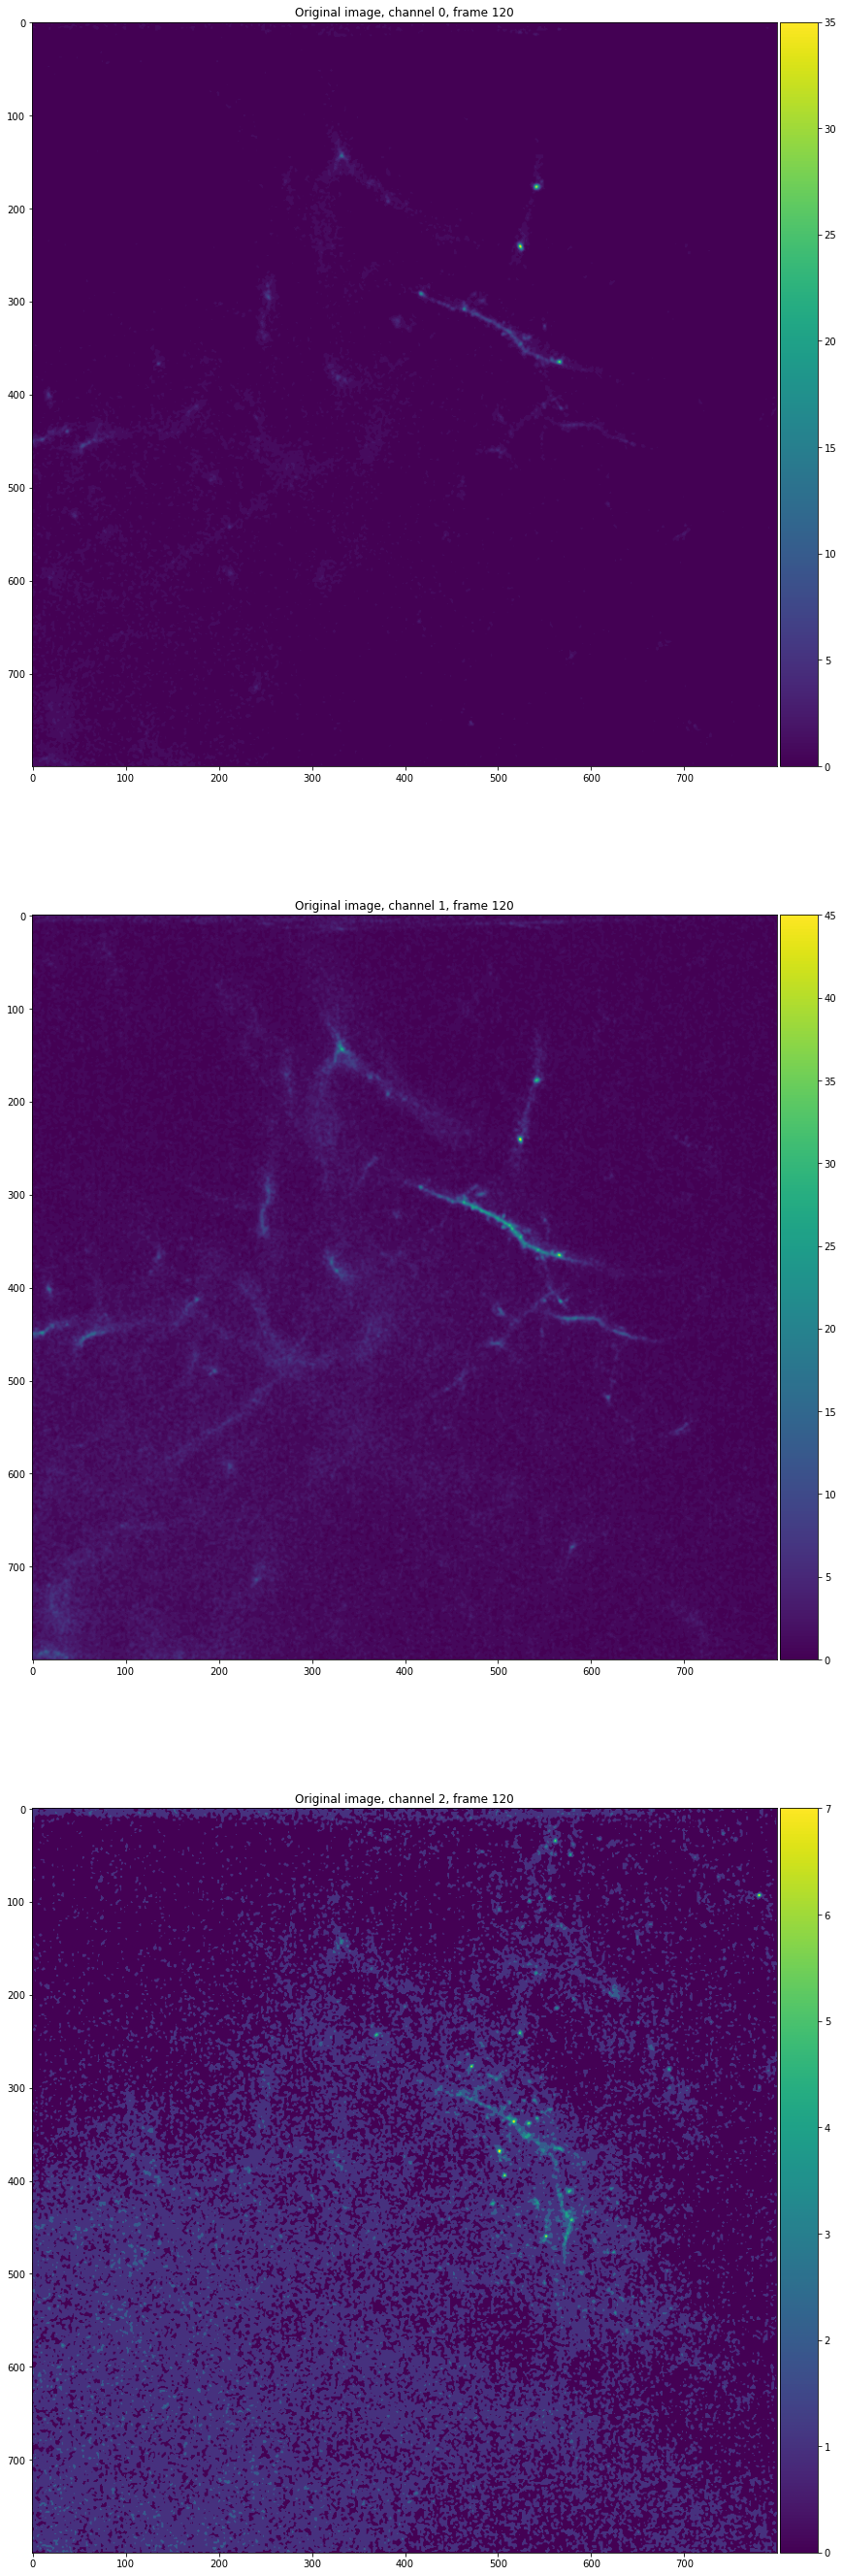

In [12]:
#plots
#plot all channels of a single frame of the unmixed image
plot.single_frame_all_channels(new_image, frame, channel)

#Probably want to do some sort of normalization on these so the same intensity is the same color. 
#What color scale would be useful?


In [ ]:
#load images to compare matlab and python
matlab_unmixed = "/Users/Gregg/Dropbox (MIT)/For Gregg/020223/Newunmixing_testing/3C_PVsynTD_TG_YFP/Unmixed/1045_8-17-2022_cell1_close__STACK_unmixed.tiff"
matlab_original = "/Users/Gregg/Dropbox (MIT)/For Gregg/020223/Newunmixing_testing/3C_PVsynTD_TG_YFP/Nounmixing_justtiffs/1045_8-17-2022_cell1_close__STACK.tiff"

python_original = "/Users/Gregg/Dropbox (MIT)/For Gregg/020223/Newunmixing_testing/3C_PVsynTD_TG_YFP/3C_PVsynTD_TG_YFP_original.tiff"
python_unmixed = "/Users/Gregg/Dropbox (MIT)/For Gregg/020223/Newunmixing_testing/3C_PVsynTD_TG_YFP/3C_PVsynTD_TG_YFP_unmixed.tiff"


matlab_original_im, tif_tags = io.imread(matlab_original, num_channels=cfg.num_channels, verbose=True)
matlab_unmixed_im, tif_tags = io.imread(matlab_unmixed, num_channels=cfg.num_channels, verbose=True)


python_original_im, tif_tags = io.imread(python_original, num_channels=cfg.num_channels, verbose=True)
python_unmixed_im, tif_tags = io.imread(python_unmixed, num_channels=cfg.num_channels, verbose=True)


In [ ]:
#compare matlab and python images
im1 = matlab_unmixed_im
im2 = python_unmixed_im
new_image = np.subtract(im1.astype(np.int16), im2.astype(np.int16))
print(new_image.dtype)
sum_diff = np.sum(np.absolute(new_image))
sum_pixels1 = np.sum(np.absolute(im1))
sum_pixels2 = np.sum(np.absolute(im2))

print(f'sum_diff: {sum_diff}')
print(f'sum_pixels: {sum_pixels1}')
print(f'sum_pixels: {sum_pixels2}')
print(f'fraction err: {sum_diff/sum_pixels}')


a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
print(a-b)

print(np.amax(im1.astype(np.int16)))
print(np.sum(im1==164))

print(np.amax(im2.astype(np.int16)))
print(np.sum(im2==197))



print(np.amin(new_image.astype(np.int16)))
print(new_image.shape)

In [ ]:
#plots for the comparison
#a single channel of original and processed images
channel = 1
frame = 190

image=matlab_unmixed_im#[1:,:,:,:]
new_image = python_unmixed_im#[:-1,:,:,:]

plot.paired_images_single_channel(image, new_image, frame, channel)


In [93]:
#use for observing pairs of pixel values to see if the algorithm seems to be working

#V This can be a bit slow, comment out the first 4 lines if necessary
indecies = np.unravel_index(new_image.argmin(), new_image.shape)
print(indecies)
print(image[:,indecies[1], indecies[2], indecies[3]])
print(new_image[:,indecies[1], indecies[2], indecies[3]])

print('######################')

frame = 1
chan_x_end = 20
chan_y = 3

for chan_x in range(chan_x_end):
    pixel = image[frame,chan_x,chan_y,:]
    print(f'pixel: {pixel}')
    unmixed_pixel = new_image[frame,chan_x,chan_y,:]
    print(f'unmixed_pixel: {unmixed_pixel}')
    print(f'unmixed dot prod: {np.dot(unmixing_mat, unmixed_pixel)}')
    x_inferred, res, rank, s = np.linalg.lstsq(unmixing_mat, pixel)
    print(f'inferred directly: {x_inferred}')
    print(f'direct dot prod: {np.dot(unmixing_mat, x_inferred)}')
    print('######################')


(0, 0, 0, 1)
[0 0 4 4]
[0.         0.         4.54519254 4.54519254]
######################
pixel: [ 3 10  4  8]
unmixed_pixel: [ 1.08725121 12.9938785   3.8852944   7.05154232]
unmixed dot prod: [ 3. 10.  4.  8.]
inferred directly: [ 1.08725121 12.9938785   3.8852944   7.05154232]
direct dot prod: [ 3. 10.  4.  8.]
######################
pixel: [14 12  3  6]
unmixed_pixel: [20.55926612  7.00142461  2.27575928  5.19338644]
unmixed dot prod: [14. 12.  3.  6.]
inferred directly: [20.55926612  7.00142461  2.27575928  5.19338644]
direct dot prod: [14. 12.  3.  6.]
######################
pixel: [0 0 0 3]
unmixed_pixel: [0.00000000e+00 0.00000000e+00 8.09248502e-16 3.00000000e+00]
unmixed dot prod: [0.00000000e+00 2.42774550e-18 6.46589553e-16 3.00000000e+00]
inferred directly: [-1.74479688e-16 -1.38777878e-16  8.04044331e-16  3.00000000e+00]
direct dot prod: [-1.33018647e-16 -1.58175051e-16  6.27165292e-16  3.00000000e+00]
######################
pixel: [3 0 2 0]
unmixed_pixel: [5.55843379 0

/var/folders/g1/6vwjn_j57xl946xjwjw3yyn80000gn/T/ipykernel_62570/1738669622.py:21: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  x_inferred, res, rank, s = np.linalg.lstsq(unmixing_mat, pixel)


(4, 6, 6, 2)
Total pixels: 144
(2, 4, 6, 6)
(4, 6, 6, 2)
True
(1, 3, 3, 1)


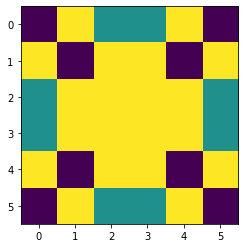

In [32]:
#code was used to help generate the algorithms with a dummy image
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage
tup = (1,2,3,4)

im = np.array([[[[1,0],[0,1,],[1,0,]],
               [[0,1],[1,1],[0,1]],
               [[1,0],[0,1],[1,0]]],#####
               [[[1,0],[0,1,],[1,0,]],
               [[0,1],[2,2],[0,1]],
               [[1,0],[0,1],[1,0]]],#####
               [[[1,0],[0,1,],[1,0,]],
               [[0,1],[3,3],[0,1]],
               [[1,0],[0,1],[1,0]]],#####
               [[[1,0],[0,1,],[1,0,]],
               [[0,1],[6,6],[0,1]],
               [[1,0],[0,1],[1,0]]]]#####
             )

im = np.tile(im,(1,2,2,1))
#we have made an image with 2 channels - 3x3 pixels and 4 z/t frames 
#+ shape in the first channel and x shape in the second channel
#when we reshape this we want to end up with 2x36, and be able to put the pluses and xs back
print(im.shape)               
total_pixels = np.prod(np.array(im.shape[:-1]))
print(f'Total pixels: {total_pixels}')

reorder_axis = np.moveaxis(im, -1, 0)
new_im= np.reshape(reorder_axis, (reorder_axis.shape[0], total_pixels))
print(reorder_axis.shape)
#print(new_im)
old_im = np.reshape(new_im, reorder_axis.shape)
old_im = np.moveaxis(old_im, 0, -1)
print(old_im.shape)   
print((old_im==im).all())
#print(old_im)
#print(im)

weights = np.array([[[[0, 1, 0],
            [1, 1, 1],
            [0, 1, 0]]]])
weights = np.moveaxis(weights, 0, -1)
print(weights.shape)

old_im = scipy.ndimage.correlate(old_im, weights, mode='constant')

channel = 0
frame = 0
cropped = old_im[frame,:,:,:]
cropped.shape

plt.imshow(cropped[:,:,channel])
